In [ ]:
import json

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
# Đọc file JSON
with open("/cm/shared/anonymous_H102/toolkitmoe/evaluate/logs/0122_1951_llava...n_dev_llava_model_args_c97a51/mmbench_en_dev.json", "r", encoding="utf-8") as file:
    neg = json.load(file)

with open("/cm/shared/anonymous_H102/toolkitmoe/evaluate/logs/0122_1956_llava...n_dev_llava_model_args_c97a51/mmbench_en_dev.json", "r", encoding="utf-8") as file:
    pos = json.load(file)


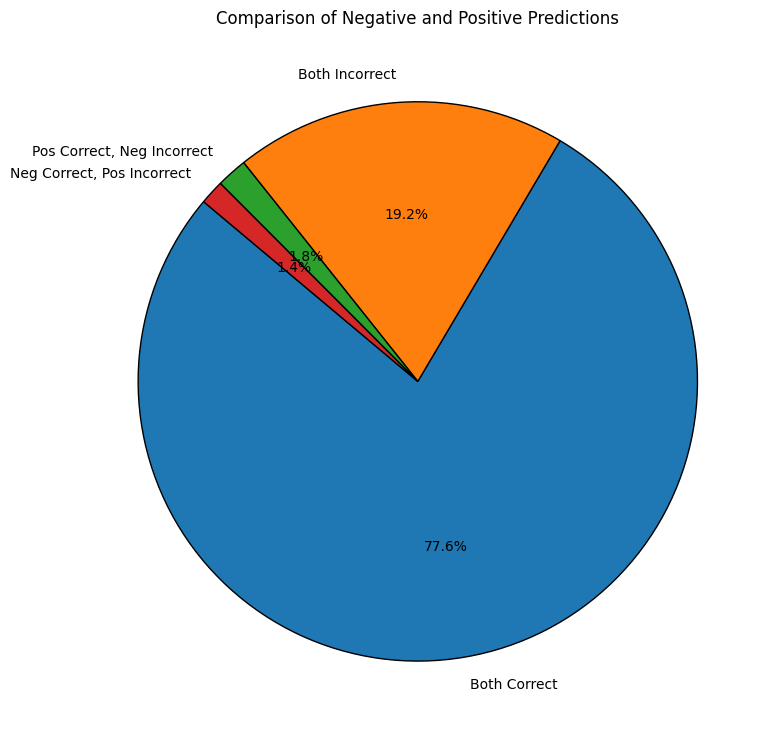

In [6]:
# Extract answers and predictions from both files
neg_results = [(log["doc"]["answer"], log["gpt_eval_score"]["prediction"]) for log in neg["logs"]]
pos_results = [(log["doc"]["answer"], log["gpt_eval_score"]["prediction"]) for log in pos["logs"]]

# Ensure the lengths of the results are the same
if len(neg_results) != len(pos_results):
    raise ValueError("The two result sets have different lengths.")

# Compare results
comparison = []
for neg_res, pos_res in zip(neg_results, pos_results):
    neg_answer, neg_pred = neg_res
    pos_answer, pos_pred = pos_res
    if neg_pred == neg_answer and pos_pred != pos_answer:
        comparison.append("Neg Correct, Pos Incorrect")
    elif neg_pred != neg_answer and pos_pred == pos_answer:
        comparison.append("Pos Correct, Neg Incorrect")
    elif neg_pred == neg_answer and pos_pred == pos_answer:
        comparison.append("Both Correct")
    elif neg_pred != neg_answer and pos_pred != pos_answer:
        comparison.append("Both Incorrect")

# Count occurrences
counts = pd.Series(comparison).value_counts()

# Visualize the results as a pie chart
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=counts.index, wedgeprops={'edgecolor': 'black'})
plt.title("Comparison of Negative and Positive Predictions")
plt.ylabel("")  # Remove the y-label for better aesthetics
plt.tight_layout()
plt.show()